# Exploratory Data Analysis of the Iris data set

The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper [The Use of Multiple Measurements in Taxonomic Problems](https://rcs.chemometrics.ru/Tutorials/classification/Fisher.pdf) as an example of linear discriminant analysis. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus"

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimetres. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.

## 🎯 Aim of the Iris Species Classifier Project

Given an Iris flower sample with various parameters, can we predict the species (with the help of the Naive Bayes classifier algorithm)?

## ⚙️ Installation and Setup

In [1]:
# ---
# Install and Setup
# ---

# System
import sys
import os

# Add the src/ directory to Python path
sys.path.append(os.path.abspath(os.path.join(os.path.dirname(""), "../src")))

import pandas as pd
import numpy as np # Linear Algebra


# Machine Learning
from sklearn.preprocessing import LabelEncoder

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Local modules
from data.load_data import get_iris_species_data

%matplotlib inline

In [2]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

In [3]:
# ---
# Load Iris Species Data in a Pandas DataFrame
# ---

df = get_iris_species_data()


## 👀 First look at the data

In [4]:
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

The dataset has 150 rows and 6 columns.


In [5]:
# ---
# Get a quick taste of the data by reviewing the first 5 rows in the data set
# ---

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### 🔣 Features

In [6]:
# ---
# For each column (i.e. variable), retrieve name, non-null value count, and data type
# ---

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


#### ❓ What do the columns represent?

<img src="img/iris_species_with_labels.png" />

Iris Flowers Species where petals and sepals are marked.

| Column | Description |
|--------|-------------|
| `Id` | Unique sample identifier |
| `SepalLengthCm` | Sepal Length in centimeters |
| `SepalWidthCm` | Sepal width in centimeters |
| `PetalLengthCm` | Petal length in centimeters |
| `PetalWidthCm` | Petal width in centimeters |
| `Species` | Iris Flower Species. This is our target variable |


##### 🎯 Target Feature

Our Target Feature is `Species`

##### 🧱 Feature Variables

Our **feature variables** are `SepalLengthCm`, `SepalWidthCm`, `PetalLengthCm`, `PetalWidthCm`.

### 🫳 Drop irrelevant columns

In this section, we drop the `Id` column from the data set, since, being an unique sample identifier, it has no predictive value whatsoever. It only slows down prediction since we have to process it. 

In [7]:
df.drop(['Id'], axis=1, inplace=True)

### 📚 Categorical and Numerical Features

Our target feature `Species` is a categorical variable that is one-hot encoded later (see feature engineering).

All our features are numerical continuous variables for which we'll investigate the distributions later. Although Gaussian Naive Bayes not assumes feature dependecy, it does ass assumes a normal distrubition, so we might have to transform (e.g. MinMax transofrm) them later.

### 🤷‍♂️ Missing Values

In [8]:
print(f'There are {df.isnull().any().sum()} columns in train dataset with missing values.')

There are 0 columns in train dataset with missing values.


We don't have any missing values, so there is no action required.

### 📊 Univariate analysis

In this section, we plot histograms, kde density plots and box plots 

In [9]:
# ---
# Show basic statistical characteristics of each numerical feature
# ---

df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
# ---
# Show basic statistical characteristics of each categorical feature
# ---

df.describe(include=["object"])

,Species
count,150
unique,3
top,Iris-setosa
freq,50


In [11]:
# ---
# Generate frequency table for our Species target variable
# ---

species_frequency_table = df["Species"].value_counts()
species_frequency_table

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [12]:
# ---
# Generate relative frequency table for our Species target variable
# ---

species_relative_frequency_table = df["Species"].value_counts(normalize=True)
species_relative_frequency_table

Species
Iris-setosa        0.333333
Iris-versicolor    0.333333
Iris-virginica     0.333333
Name: proportion, dtype: float64

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor), and hence is evenly distributed.

### 📊 Bivariate Analysis

In [13]:
# ---
# Set sns palette

palette = ['#7E57C2', '#4DB6AC', '#303F9F']
sns.set_palette(palette)

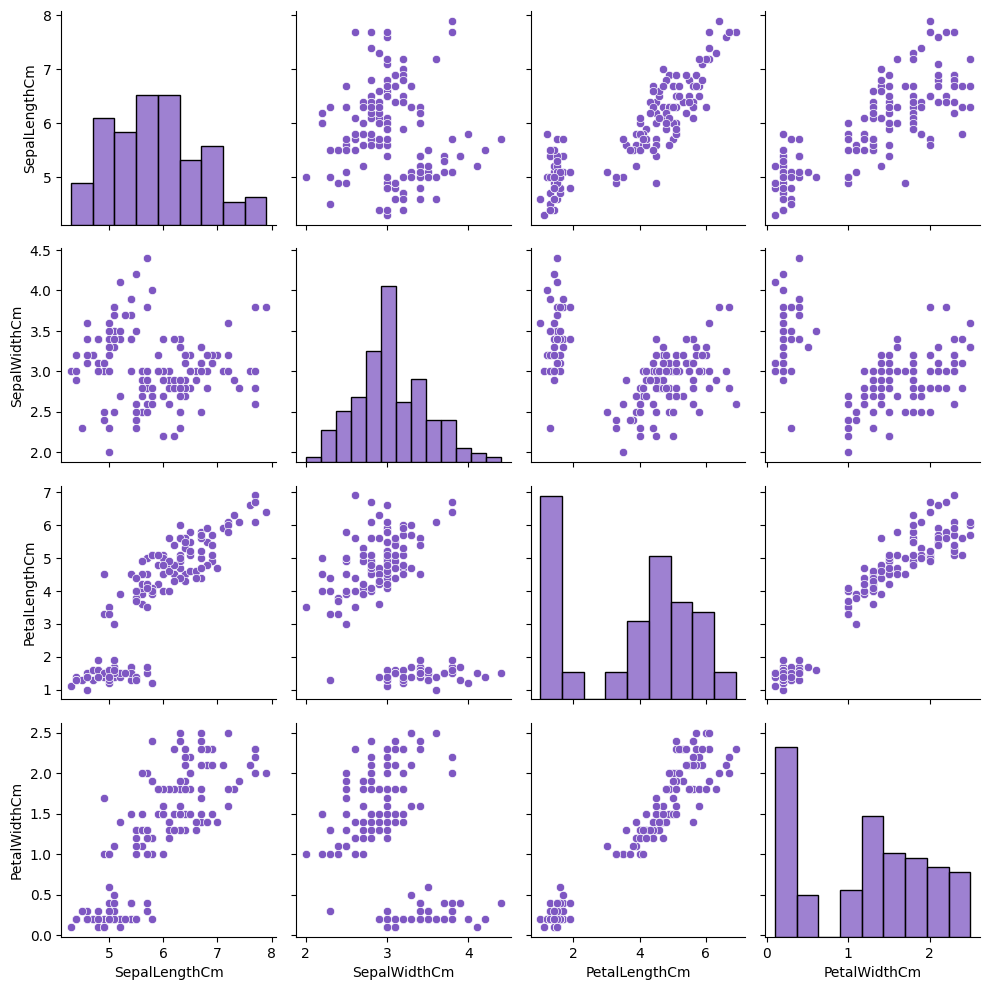

In [14]:
sns.pairplot(df)
plt.tight_layout()
plt.show()

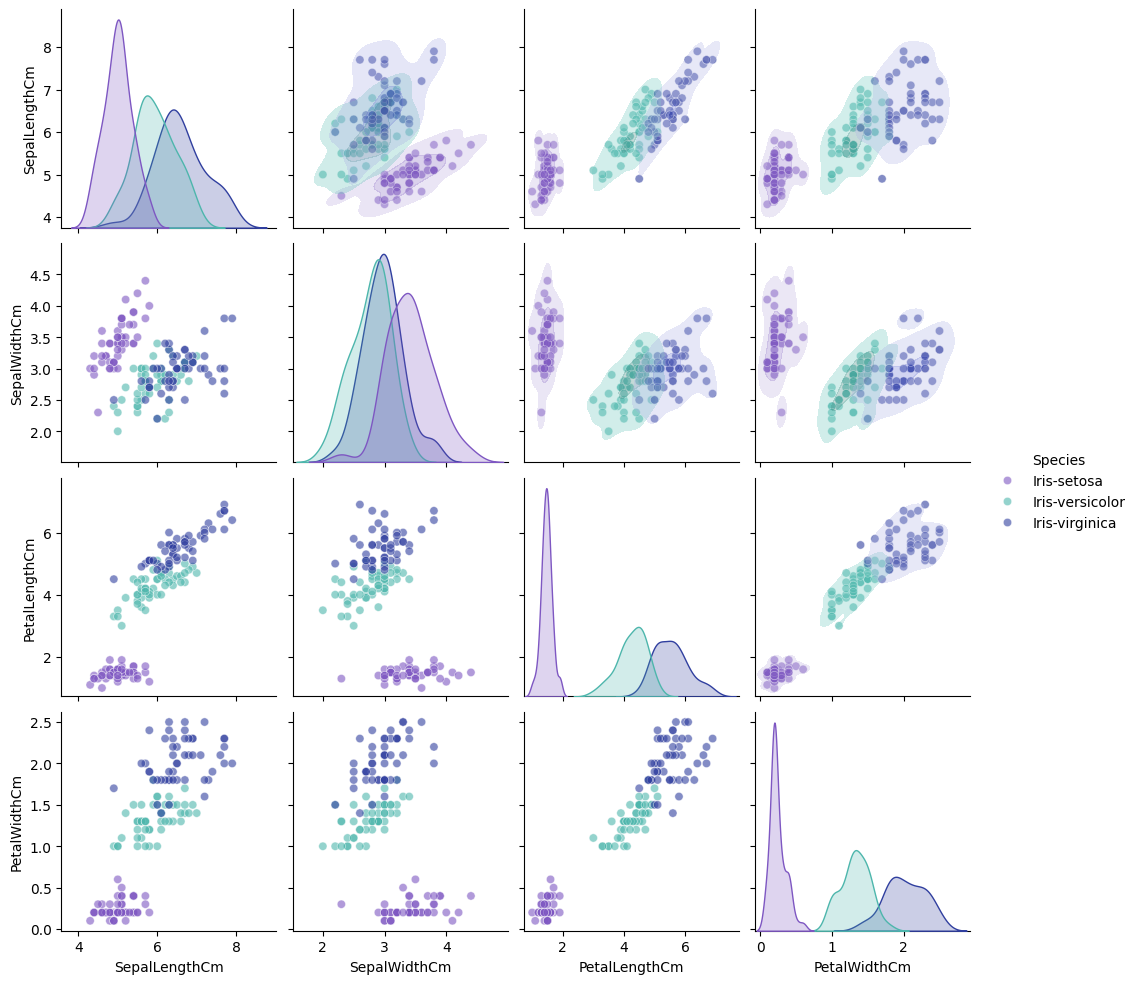

In [15]:
# ---
# Distribution of continuous features according to target variable
# ---

g = sns.pairplot(df, diag_kind="kde", hue='Species', plot_kws={'alpha': 0.6})
g.map_upper(sns.kdeplot, levels=3, fill=True, alpha=0.3)
plt.show()

Iris Setosa species is linearly separable from the other two, but the other two are not linearly separable from each other.

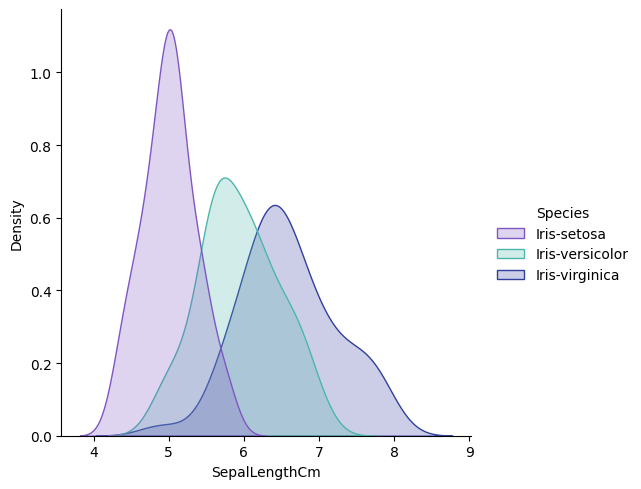

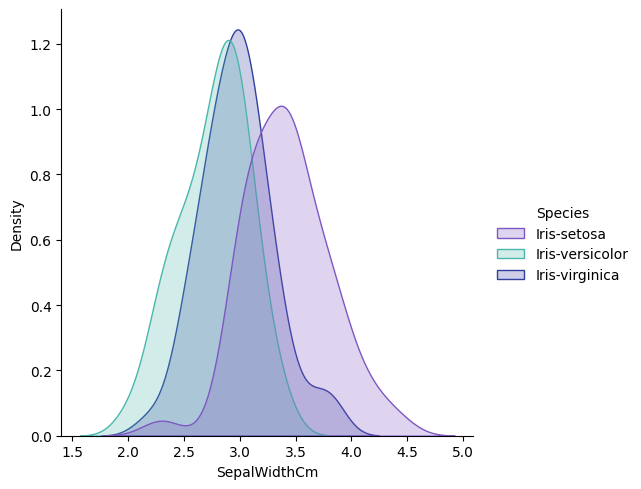

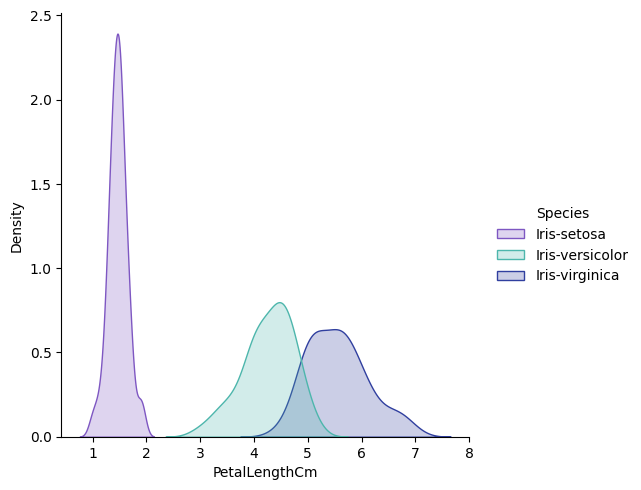

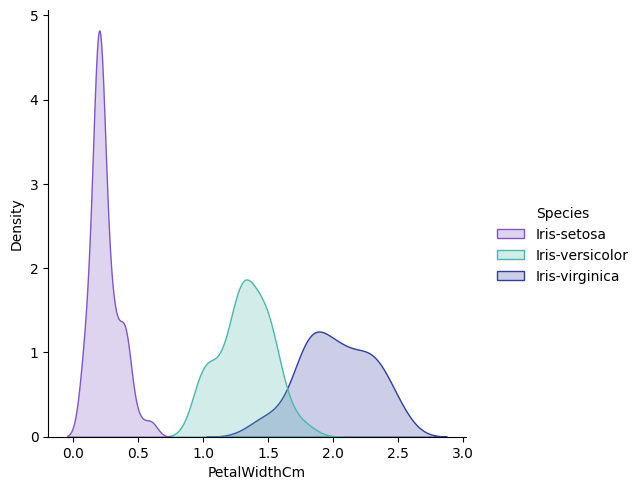

In [16]:
for col in df.columns[:-1]:  # excluding target
    sns.displot(df, x=col, hue='Species', kind='kde', fill=True, common_norm=False)

In [17]:
from sklearn.feature_selection import f_classif
X = df.drop("Species", axis=1)
y = df["Species"]
f_scores, _ = f_classif(X, y)
print(dict(zip(X.columns, f_scores)))


{'SepalLengthCm': np.float64(119.26450218449871), 'SepalWidthCm': np.float64(47.364461402993975), 'PetalLengthCm': np.float64(1179.0343277002278), 'PetalWidthCm': np.float64(959.3244057257541)}


| F-score Value | Interpretation | 
|---------------|----------------|
| 🔥 High (e.g. > 100) | Strongly discriminatory feature |
| ✅ Moderate (e.g. 10–100) | Some discriminatory power |
| ⚠️ Low (e.g. < 10) | Likely not helpful for classification |

Looking at the KDE plots, we see that `petals` are reasonbly good discriminatory features, while `sepals` have less discriminatory power. Zooming in with ANOVA F-scores, we see the same. `PetalLengthCm`, `PetalWidthCm`, and `SepalLengthCm` are strong discriminatory features, while `SepalWidthCm` has some discriminatory power. 

We could try to train the model without `SepalWidthCm` to check the effects on its predicitive capabilities.

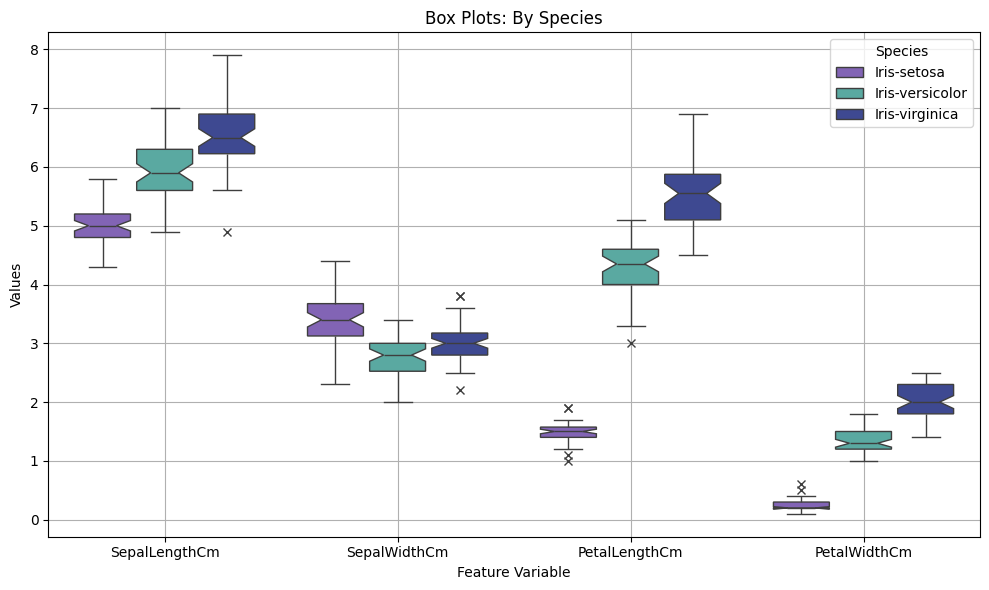

In [18]:
feature_vars_cols = df.select_dtypes(exclude='object').columns

plt.figure(figsize=(10,6))
df_melted = df.melt(id_vars=['Species'], value_vars=feature_vars_cols)
sns.boxplot(x='variable', y='value', data=df_melted, hue='Species', palette=palette, gap=.1, notch=True, showcaps=True, flierprops={"marker": "x"})
plt.title('Box Plots: By Species')
plt.xlabel('Feature Variable')
plt.ylabel('Values')
plt.grid()
plt.tight_layout()
plt.show()


GNB is **extremely sensitive** to outliers, because it assumes normally distributed features and computes the likelihood using the mean and variance. Outliers can severely skew these parameters and degrade performance.

We will remove outliers with the **IQR method**.

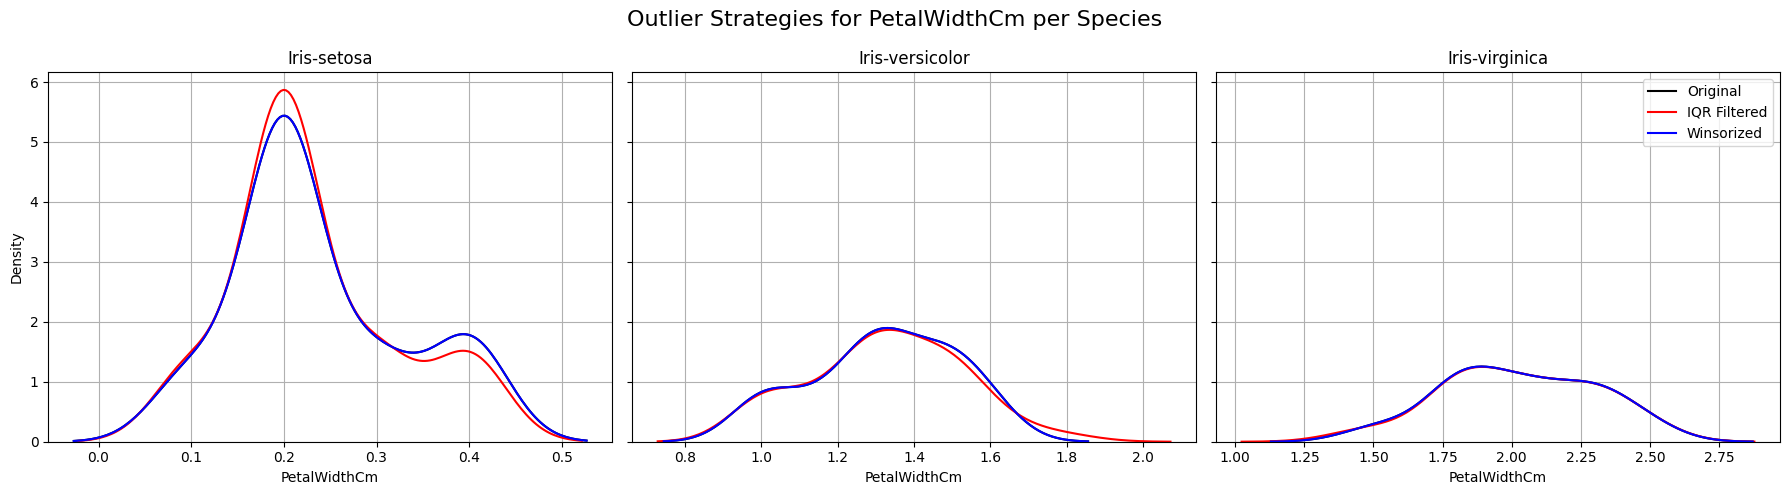

In [19]:
from scipy.stats.mstats import winsorize

def plot_outlier_strategies_by_species(df, column):
    import seaborn as sns
    import matplotlib.pyplot as plt

    species_list = df['Species'].unique()
    fig, axes = plt.subplots(1, len(species_list), figsize=(18, 5), sharey=True)

    for i, species in enumerate(species_list):
        subset = df[df['Species'] == species][column]

        # IQR filtering
        Q1 = subset.quantile(0.25)
        Q3 = subset.quantile(0.75)
        IQR = Q3 - Q1
        iqr_filtered = subset[(subset >= Q1 - 1.5 * IQR) & (subset <= Q3 + 1.5 * IQR)]

        # Winsorized
        winsor = winsorize(subset, limits=[0.05, 0.05])

        sns.kdeplot(subset, ax=axes[i], label='Original', color='black')
        sns.kdeplot(iqr_filtered, ax=axes[i], label='IQR Filtered', color='red')
        sns.kdeplot(winsor, ax=axes[i], label='Winsorized', color='blue')

        axes[i].set_title(f'{species}')
        axes[i].set_xlabel(column)
        axes[i].grid(True)

        if i == 0:
            axes[i].set_ylabel("Density")
        else:
            axes[i].set_ylabel("")

    fig.suptitle(f"Outlier Strategies for {column} per Species", fontsize=16)
    plt.tight_layout()
    plt.legend()
    plt.show()

# Example usage:
plot_outlier_strategies_by_species(df, "PetalWidthCm")


In [20]:
# ---
# IQR filtering
# ---


def filter_outliers_iqr_by_species(df, threshold=1.5):
    """
    Filters out outliers based on the IQR method, applied independently for each species.
    
    Parameters:
    - df: DataFrame to filter
    - threshold: IQR multiplier (default: 1.5, which is standard)
    
    Returns:
    - df: The filtered DataFrame with outliers removed in-place
    """
    
    # Create an empty DataFrame to store the filtered results
    filtered_df = pd.DataFrame()

    # Group by species and apply IQR filtering
    for species, group in df.groupby('Species'):
        # For each group (species), apply IQR filtering on numerical columns
        for column in group.select_dtypes(include='number').columns:
            # Calculate Q1 (25th percentile) and Q3 (75th percentile)
            Q1 = group[column].quantile(0.25)
            Q3 = group[column].quantile(0.75)
            
            # Calculate IQR
            IQR = Q3 - Q1
            
            # Calculate the lower and upper bounds for outliers
            lower_bound = Q1 - threshold * IQR
            upper_bound = Q3 + threshold * IQR
            
            # Filter the group by the bounds
            group = group[(group[column] >= lower_bound) & (group[column] <= upper_bound)]
        
        # Append the filtered group back to the main DataFrame
        filtered_df = pd.concat([filtered_df, group], axis=0)
    
    # Reset the index to avoid duplicate index values after filtering
    return filtered_df.reset_index(drop=True)

df = filter_outliers_iqr_by_species(df)


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  142 non-null    float64
 1   SepalWidthCm   142 non-null    float64
 2   PetalLengthCm  142 non-null    float64
 3   PetalWidthCm   142 non-null    float64
 4   Species        142 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.7+ KB


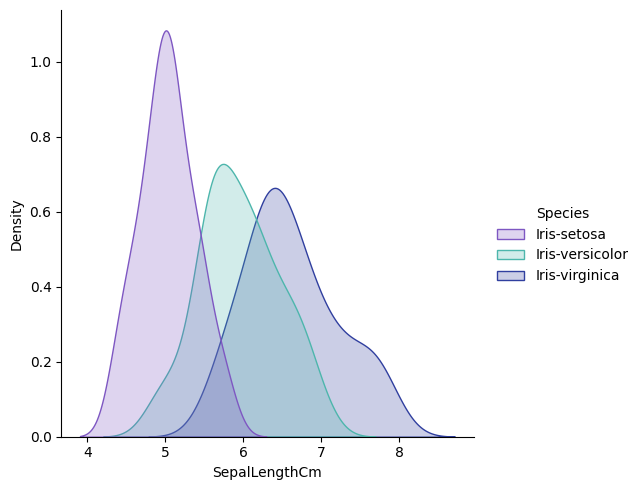

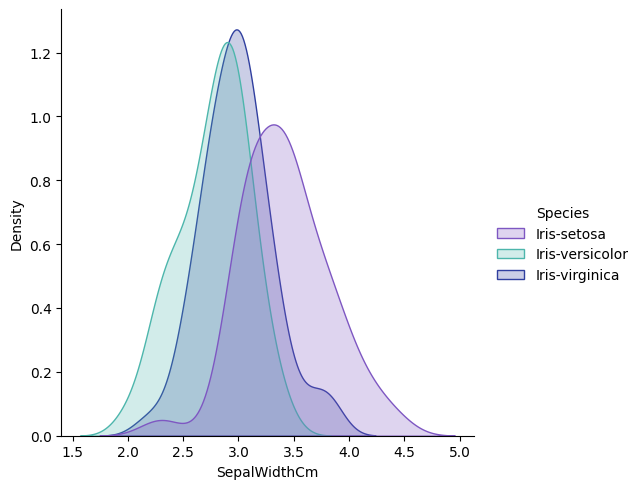

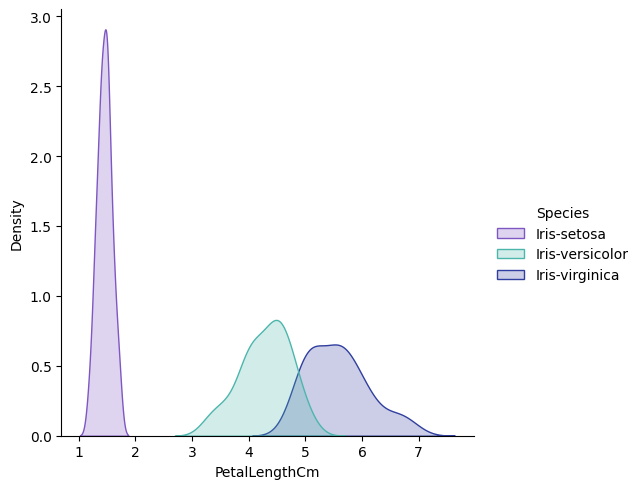

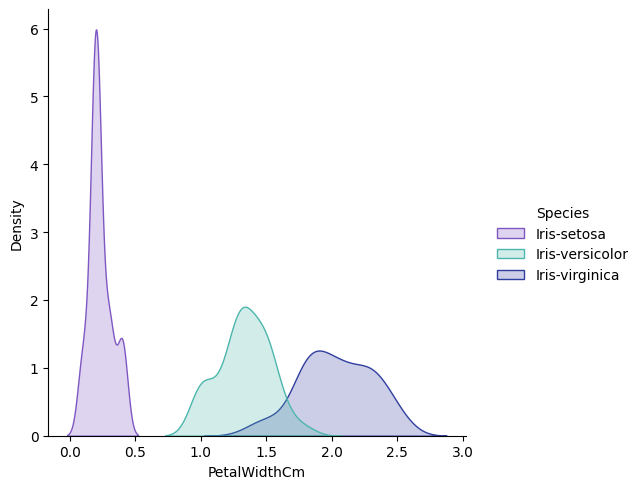

In [22]:
for col in df.columns[:-1]:  # excluding target
    sns.displot(df, x=col, hue='Species', kind='kde', fill=True, common_norm=False)

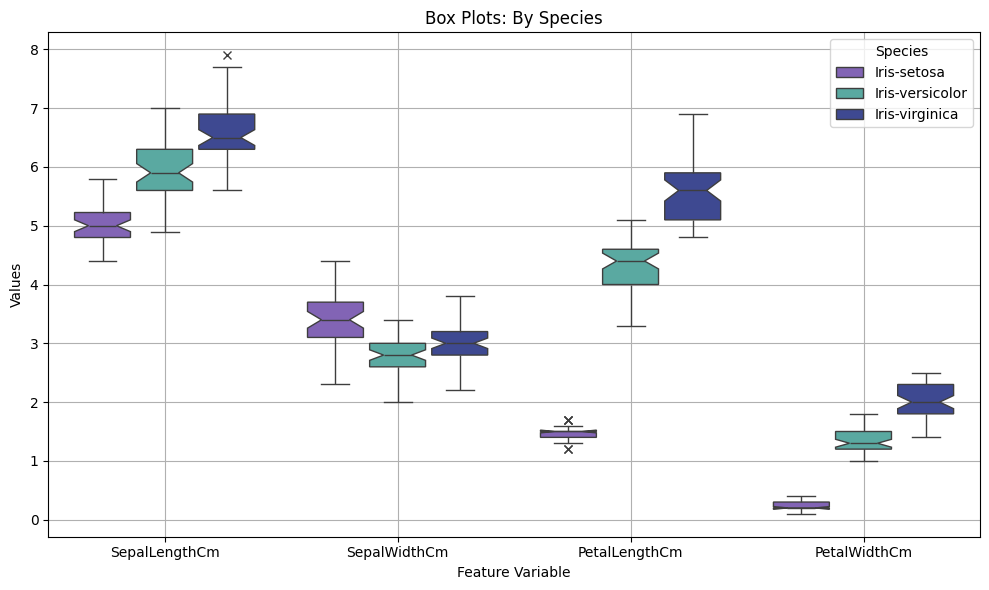

In [23]:
plt.figure(figsize=(10,6))
df_melted = df.melt(id_vars=['Species'], value_vars=feature_vars_cols)
sns.boxplot(x='variable', y='value', data=df_melted, hue='Species', palette=palette, gap=.1, notch=True, showcaps=True, flierprops={"marker": "x"})
plt.title('Box Plots: By Species')
plt.xlabel('Feature Variable')
plt.ylabel('Values')
plt.grid()
plt.tight_layout()
plt.show()

### Correlation

<img src="img/correlation-examples.svg" />

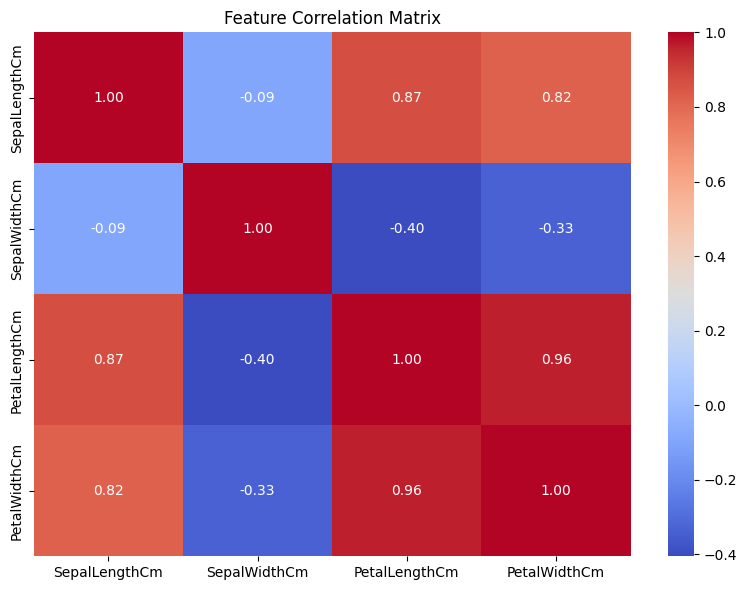

In [24]:
# calculate the correlation matrix on the numeric columns
corr_matrix = df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()


There are strong correlations between:
- `PetalLengthCm` & `PetalWidthCm` (0.97)
- `SepalLengthCm` & `PetalLengthCm` (0.88)
- `SepalLengthCm` & `PetalWidthCm` (0.84)

GNB assumes independence between features given the class, and high correlation violates assumptions, which may lead to:
- Overcounting their effect.
- Poor generalization.

We combine correlated features to mitigate overcounting and generalization effects.


In [25]:
df["PetalAreaCm2"] = df["PetalLengthCm"] * df["PetalWidthCm"]
df["SepalAreaCm2"] = df["SepalLengthCm"] * df["SepalWidthCm"]

In [26]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,PetalAreaCm2,SepalAreaCm2
0,5.1,3.5,1.4,0.2,Iris-setosa,0.28,17.85
1,4.9,3.0,1.4,0.2,Iris-setosa,0.28,14.70
2,4.7,3.2,1.3,0.2,Iris-setosa,0.26,15.04
3,4.6,3.1,1.5,0.2,Iris-setosa,0.30,14.26
4,5.0,3.6,1.4,0.2,Iris-setosa,0.28,18.00


### 🏷️ Label encoding

Species is a categorical feature with nominal values, meaning the categories (species) don’t have any inherent order (no ordinal relationship).

GNB treats each unique class (species) as a separate category with a distinct label (e.g., 0, 1, 2 for setosa, versicolor, and virginica). This allows the model to compute the probability for each category without introducing artificial ordinal relationships, and categorical feature in its raw form without creating additional sparsity or dimensionality.

In [27]:

label_encoder = LabelEncoder()
df['Species'] = label_encoder.fit_transform(df['Species'])

df['Species'].unique()

array([0, 1, 2])

### ⚖️ Scaling feature variables

Gaussian Naive Bayes assumes that each feature is conditionally independent and normally distributed given the class. For a single feature $x_i$, it models the likelihood as:

$P(x_i|y=c)=\frac{1}{\sqrt{2\pi\sigma_{c,i}^2}}^{-\frac{(x_i - \mu_{c,i})^2}{2\sigma_{c,i}^2}}$


Here’s what that means:

- The model **learns $\mu$ and $\sigma^2$ per feature and per class** - i.e. directly from the data during training.
- Each feature is treated separately (feature independence), and the scale or units of one feature don’t affect the others.
- During prediction, GNB uses these class-specific Gaussians to compute the **posterior probabilities**.


In contrast to algorithms like SVMs, KNN, or Logistic Regression, where feature scale directly affects distances or optimization convergence, GNB is invariant to feature scale in practice, hence we do not need to scale feature variables.


## 🏋️‍♂️ Training Gaussian Naive Bayes Classifier

In [28]:
X = np.array([[-2, -1], [-1, -1], [-1, -2], [1, 1], [1, 2], [2, 1]])
y = np.array([1, 1, 1, 2, 2, 2])

classes, count = np.unique(y, return_counts=True)

print(f"{classes}, {count}, {count.sum()}")

[1 2], [3 3], 6
